# Examples of the Bayesian Framework

This Python notebook covers some examples of Bayes' Theory, but focused on meteorological applications.

First, let's look at a simple example of Bayes' Theorem.  We start with two events $A$ and $B$.  Here are four probabilities we can construct from this:

- $P(A)$ - The probability of event $A$.
- $P(B)$ - The probability of event $B$.
- $P(A|B)$ - The probability of event $A$, given event $B$ has occurred (a conditional probability).
- $P(B|A)$ - The probability of event $B$, given event $A$ has occurred (a conditional probability).

### Bayes' Theorem

Bayes' Theorem can help us solve for these probabilities given that we know three of these probabilities.  Here's the equation:

$\large P(A|B) = \frac{P(A) P(B|A)}{P(B)}$

There are four probabilities we have here:

- Posterior probability $P(A|B)$ (updated probability after the evidence is considered)
- Prior probability $P(A)$ (the probability before the evidence is considered)
- Likelihood $P(B|A)$ (probability of the evidence, given the belief is true)
- Marginal probability $P(B)$ (probability of the evidence, under any circumstance)

### Example 1

For example:

- Suppose the probability of the weather being cloudy is 40%.
- Also suppose the probability of rain on a given day is 20%.
- Also suppose the probability of clouds on a rainy day is 85% (our conditional probability!)

Our question: If it’s cloudy outside on a given day, what is the probability that it will rain that day?

What are our events in this context?  There are two: It is cloudy, it is rainy.

Let's set this up:

$P(rain) = 0.20$ ($P(A)$, the prior probability - before any evidence is considered)

$P(cloudy) = 0.40$ ($P(B)$, our new information, also called the marginal probability)

$P(cloudy | rain) = 0.85$  ($P(B|A)$, the likelihood or probability of clouds on a rainy day)

$P(rain | cloudy) = $ ? ($P(A|B)$, the posterior probability)

In [79]:
#define function for Bayes' theorem
def bayesTheorem(pA, pB, pBA):
    return pA * pBA / pB

#define probabilities
pRain = 0.2
pCloudy = 0.4
pCloudyRain = 0.85

#use function to calculate conditional probability
bayesTheorem(pRain, pCloudy, pCloudyRain)

0.425

We can also test Bayes' theorm for several different values of $P(cloudy | rain)$:

In [109]:
for pCloudyRain in np.arange(0.2,.95,.05):
    pRainCloudy = bayesTheorem(pRain, pCloudy, pCloudyRain)
    print(np.round(pCloudyRain,2), np.round(pRainCloudy,2))

0.2 0.04
0.25 0.06
0.3 0.07
0.35 0.08
0.4 0.09
0.45 0.1
0.5 0.11
0.55 0.12
0.6 0.13
0.65 0.14
0.7 0.16
0.75 0.17
0.8 0.18
0.85 0.19
0.9 0.2


### Example 2

We can also do this with probability distribution functions (PDF).  Python allows us to play with a number of these, which we can use with Bayes' Theorem.  Instead of dealing with individual probabilities of binary events (rain, no-rain, clouds, no-clouds), like we did so above, we can work with probabilities of continous variables such as temperature.  Let's just work with Gaussian distributions right now.

Let's start off with importing some of the packages we'll need to visualize these distributions.

In [63]:
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

Let's make a sample PDF for a Gaussian distribution.

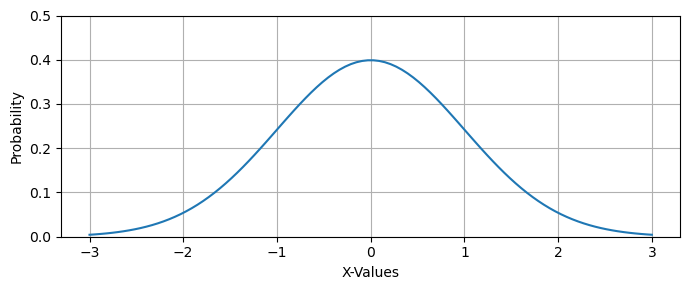

In [64]:
x = np.linspace(-3,3,100)
# This command creates a list of 100 evenly spaced numbers between -3 and 3.
our_pdf = stats.norm.pdf(x)

plt.figure(figsize=(7,3))
plt.plot(x, our_pdf, label='Gaussian PDF')
plt.ylabel("Probability")
plt.xlabel("X-Values")
plt.ylim(0,0.5)
plt.grid()
plt.tight_layout()
plt.show()

Let's make some fake temperature data so we can explore Bayes' Theorem even more.

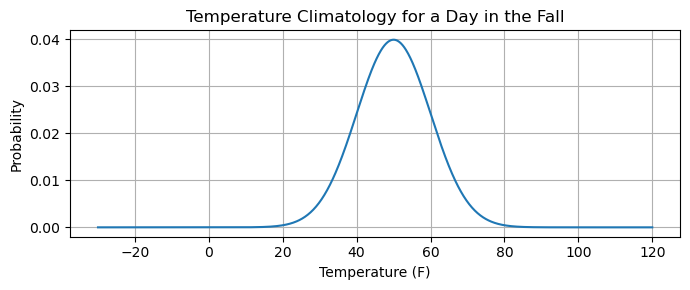

In [65]:
x = np.linspace(-30,120,1000)
# This command creates a list of 1000 evenly spaced numbers between -30 and 120.
temperature_pdf = stats.norm.pdf(x, loc=50, scale=10)  # You may want to change the loc and scale values to explore how it impacts the data.

plt.figure(figsize=(7,3))
plt.title("Temperature Climatology for a Day in the Fall")
plt.plot(x, temperature_pdf, label='Gaussian PDF')
plt.ylabel("Probability")
plt.xlabel("Temperature (F)")
plt.grid()
plt.tight_layout()
plt.show()

Let's call this PDF of temperature the prior data set.  We can do this in a single cell.

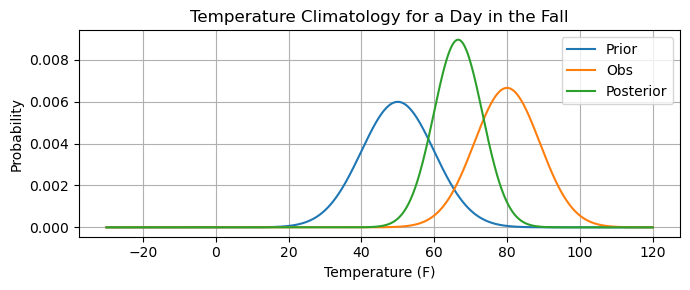

In [112]:
x = np.linspace(-30,120,1000)
# This command creates a list of 1000 evenly spaced numbers between -30 and 120.
prior = stats.norm.pdf(x, loc=50, scale=10)  # You may want to change the loc and scale values to explore how it impacts the data.
prior = prior / np.sum(prior)

likelihood = stats.norm.pdf(x, loc=80, scale=9) # Obs
likelihood = likelihood / np.sum(likelihood)

posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

plt.figure(figsize=(7,3))
plt.title("Temperature Climatology for a Day in the Fall")
plt.plot(x, prior, label='Prior')
plt.plot(x, likelihood, label="Obs")
plt.plot(x, posterior, label="Posterior")
plt.ylabel("Probability")
plt.xlabel("Temperature (F)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()